# Using the NASA VEDA EOAPI

This notebook is divided into two parts, each demonstrating the functionalities of the VEDA Earth Observation API (EOAPI).
1. Reading and visualizing one of the datasets from the VEDA data catalog
2. Using the EOAPI to generate a time-series of OMI (ozone monitoring instrument) NO₂ and SO₂ datasets

Author: Slesa Adhikari

#### 1. Reading and visualizing one of the datasets from the VEDA data catalog

**Import all the necesssary libraries**

Make sure you install these first using:

```bash
pip install pystac_client folium seaborn pandas
```

In [73]:
# imports
import requests
from pystac_client import Client
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

**Define the API endpoints**

The EOAPI is a combination of two components.
1. Data catalog - the [SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/en/) specification is used to catalog the available datasets
2. Dynamic tile server - [TiTiler](https://developmentseed.org/titiler/) is used to dynamically serve cloud optimized geotiff (raster) data files

In [74]:
STAC_API_URL = "https://staging-stac.delta-backend.com/"
RASTER_API_URL = "https://staging-raster.delta-backend.com"

Use the `pystac_client` library to interact with the STAC data catalog

In [75]:
catalog = Client.open(STAC_API_URL)

List all the datasets (collections) in the catalog

In [76]:
for collection in list(catalog.get_collections()):
    print(f"{collection.id} - {collection.title}")

EPA-annual-emissions_6D_Composting - Gridded 2012 EPA Methane Emissions - Composting
nightlights-500m-daily - Black Marble 500m Nightlights Daily Dataset
landsat-c2l2-sr-antarctic-glaciers-thwaites - Selected Landsat 7 through 9 Surface Reflectance Scenes for the Thwaites Glacier
landsat-c2l2-sr-antarctic-glaciers-pine-island - Selected Landsat 7 through 9 Surface Reflectance Scenes for the Pine Island Glacier
social-vulnerability-index-household - Social Vulnerability Index (Household)
no2-monthly - NO₂
no2-monthly-diff - NO₂ (Diff)
sport-lis-vsm0_100cm-percentile - 0-100 cm Volumetric Soil Moisture (%)
lis-global-da-gws - Groundwater Storage - LIS 10km Global DA
mtbs-burn-severity - MTBS Burn Severity
ecco-surface-height-change - ECCO sea-surface height change from 1992 to 2017
eis_fire_fireline - Active Fire Line
oco2-geos-l3-daily - Gridded Daily OCO-2 Carbon Dioxide assimilated dataset
lis-global-da-evap - Evapotranspiration - LIS 10km Global DA
eis_fire_newfirepix - VIIRs Fire De

Choose a collection to work with. We'll choose the `no2-monthly` dataset for this example.
This is the global nitrogen dioxide data organized into monthly metrics.

In [77]:
collection_id = "no2-monthly"

Search all the items in the collection.

In [78]:
search = catalog.search(collections=[collection_id])
items = list(search.items())
items

[<Item id=OMI_trno2_0.10x0.10_202212_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202211_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202210_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202209_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202208_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202207_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202206_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202205_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202204_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202203_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202202_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202201_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202112_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202111_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202110_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202109_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202108_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202107_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202106_Col3_V4.nc>,
 <Item id=OMI_trno2_0.10x0.10_202105_Col3_V4.nc>,


Load and inspect one of the item's assets. In the catalog, the cloud optimized geotiffs (COG) are indexed under `cog_default` asset.

In [79]:
s3_uri = items[0].assets["cog_default"].href

Get statistics for the COG file using the TiTiler api endpoint `/cog/statistics`

In [80]:
stats = requests.get(
    f"{RASTER_API_URL}/cog/statistics",
    params={"url": s3_uri}
).json()
stats

{'1': {'min': -6707683428139008.0,
  'max': 3.884375294450074e+16,
  'mean': 423085978017950.7,
  'count': 434008.0,
  'sum': 1.8362269914761475e+20,
  'std': 971153921053730.1,
  'median': 245577371615232.0,
  'majority': 121884402253824.0,
  'minority': -6187472157409280.0,
  'unique': 334278.0,
  'histogram': [[58.0,
    423787.0,
    8532.0,
    1008.0,
    339.0,
    199.0,
    79.0,
    4.0,
    0.0,
    2.0],
   [-6707683428139008.0,
    -2152539764031488.0,
    2402603900076032.0,
    6957747698401280.0,
    1.151289069142016e+16,
    1.6068035295051776e+16,
    2.062317882494157e+16,
    2.517832235483136e+16,
    2.973346588472115e+16,
    3.4288609414610944e+16,
    3.884375294450074e+16]],
  'valid_percent': 82.78,
  'masked_pixels': 90280.0,
  'valid_pixels': 434008.0,
  'percentile_2': -178728386691072.0,
  'percentile_98': 2662192260317184.0}}

**Display the COG in a map**

Now, we'll make a request for imagery tiles to the raster API.

Define the query parameters for the request:
- collection
- item
- rescale
- colormap
- assets

In [81]:
collection = collection_id
item = items[0].id
colormap = "rainbow"
assets = "cog_default"
rescale = f"{stats['1']['min']},{stats['1']['max']}"

Get the tileset json for the relevant item.

In [82]:
tiles = requests.get(
    f"{RASTER_API_URL}/stac/tilejson.json?collection={collection}&item={item}&assets={assets}&colormap_name={colormap}&rescale={rescale}"
).json()

In [83]:
tiles

{'tilejson': '2.2.0',
 'version': '1.0.0',
 'scheme': 'xyz',
 'tiles': ['https://staging-raster.delta-backend.com/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=no2-monthly&item=OMI_trno2_0.10x0.10_202212_Col3_V4.nc&assets=cog_default&colormap_name=rainbow&rescale=-6707683428139008.0%2C3.884375294450074e+16'],
 'minzoom': 0,
 'maxzoom': 24,
 'bounds': [-180.0, -90.0, 180.0, 90.0],
 'center': [0.0, 0.0, 0]}

Use the `/tiles` endpoint to visualize the file in a map

In [88]:
m = folium.Map(
    zoom_start=10,
    scroll_wheel_zoom=True, 
    tiles=tiles["tiles"][0],
    attr="VEDA", 
    minzoom=0, 
    maxzoom=18,
)

In [89]:
m

#### 2. Using the EOAPI to generate a time-series of OMI NO₂ and SO₂ datasets

There's a story published in the EODashboard with the following title:

> Air pollution in India, China and the U.S. have changed significantly over the past two decades

Link: https://eodashboard.org/story?id=air-pollution-us-india-china

The story talks about the trend of air pollution in India, China and the U.S. using the NO<sub>2</sub> and SO<sub>2</sub> readings taken from the OMI instrument

Here, we'll recreate the analysis using the EOAPI.

In [90]:
# Here, we find the relevant collection ID for the dataset
collections = {
    "no2": "OMI_trno2-COG",
    "so2": "OMSO2PCA-COG",
}

Define the roughly similar Area of Interest (AOI) for each of the countries as seen in the story.

Disclaimer: Since the AOI is roughly similar, but not exactly the same, the results may differe slightly, but should maintain similar trends.

In [91]:
aois = {
    "india": {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              84.44227371801799,
              25.276852788244952
            ],
            [
              81.73331688510166,
              25.379576397063317
            ],
            [
              81.40290450746915,
              20.640781701865322
            ],
            [
              84.09079123546121,
              20.59296261766137
            ],
            [
              84.44227371801799,
              25.276852788244952
            ]
          ]
        ],
        "type": "Polygon"
      }
    },
    "china": {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              118.14487188674968,
              40.38237805885373
            ],
            [
              112.59679754686567,
              40.39197699341523
            ],
            [
              112.78712023622006,
              32.015052150835814
            ],
            [
              117.937454307721,
              32.102440507249895
            ],
            [
              118.14487188674968,
              40.38237805885373
            ]
          ]
        ],
        "type": "Polygon"
      }
    },
    "usa": {
        "type": "Feature",
        "properties": {},
        "geometry": {
            "coordinates": [
            [
                [
                -80.16702521343733,
                41.73420113945659
                ],
                [
                -83.56446680395005,
                38.599369254919566
                ],
                [
                -82.00280661075571,
                37.54658260550103
                ],
                [
                -78.28140359718638,
                40.450899619800595
                ],
                [
                -80.16702521343733,
                41.73420113945659
                ]
            ]
            ],
            "type": "Polygon"
        }
    },
}

Define a function that takes the following params:
  1. `item`: a STAC item
  2. `geojson`: the geojson of the AOI

Using the `/cog/statistics/` endpoint of the raster API, we get back the statistics of the `item` (which corresponds to one COG file) within the given `geojson` AOI.

The statistics includes `min`, `max`, `mean`, `std`, etc.

In [92]:
# the bounding box should be passed to the geojson param as a geojson Feature or FeatureCollection
def generate_stats(item, geojson):
    result = requests.post(
        f"{RASTER_API_URL}/cog/statistics", 
        params={
            "url": item.assets["cog_default"].href
        },
        json=geojson
    ).json()
    return {
        **result["properties"],
        "start_datetime": str(item.properties.get("datetime", item.properties.get("start_datetime")))[:4],
        "collection": item.collection_id
    }

Let's start out with the US 🇺🇸 !

We'll get all the items in the NO2 and SO2 collections and generate the statistics from them for the Ohio River Valley region of the United States.

In [93]:
usa_aoi = aois["usa"]
items = list(catalog.search(collections=[collections["no2"], collections["so2"]]).items())
usa_stats = [
    generate_stats(item, usa_aoi)
    for item in items
]

Create a function that takes the statistics (which is a json) and converts it to a pandas dataframe in a format that'll make it easy to read and visualize.

We are only concerned with the `mean` statistics for this example. Specifically the change from the year 2005 as a percentage. We'll use pandas to calculate this change percentage and assign it to the `change` column.

In [94]:
def clean_stats(stats_json) -> pd.DataFrame:
    # convert the stats_json as is to pandas dataframe
    df = pd.json_normalize(stats_json)
    # simple renaming for readability
    df.columns = [col.replace("statistics.1.", "") for col in df.columns]
    # create a date column from the start_datetime column
    df["date"] = pd.to_datetime(df["start_datetime"], format="mixed")
    # rename the collection to a more friendly name
    df["collection"] = df["collection"].map(lambda x: next(key for key, value in collections.items() if value == x))
    # sort the dataframe by the date column
    df = df.sort_values(by=["date"])
    # create a change column that calculates the change of the mean values from the value in 2005
    df["change"] = df.groupby("collection", group_keys=False)["mean"].apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))
    return df

In [95]:
cleaned_stats_df = clean_stats(usa_stats)

We'll now create a time-series of the change in mean values for NO2 and SO2 for the area in the US.

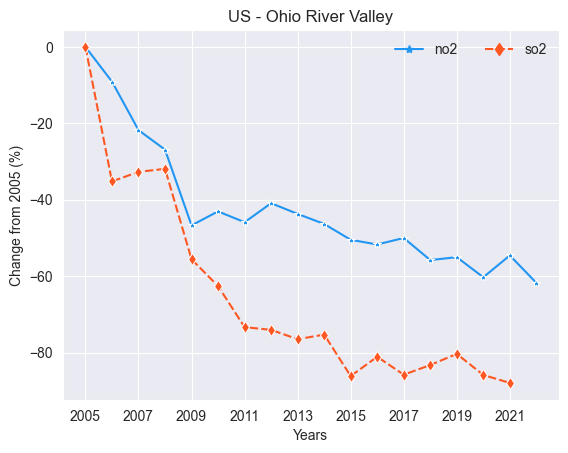

In [96]:
plt.xticks([i for i in range(0, 21, 2)])
sns.set_style("darkgrid")
ax = sns.lineplot(
    x="start_datetime",
    y="change",
    hue="collection",
    data=cleaned_stats_df,
    palette=["#2196f3", "#ff5722"],
    style="collection",
    markers=["*", "d"],
)
ax.set_title("US - Ohio River Valley")
ax.set_xlabel("Years")
ax.set_ylabel("Change from 2005 (%)")
plt.legend(frameon=False, ncol=3)
plt.show()

Now, let's create a function that creates this trend graph, given the country.

In [97]:
def create_chart(country):
    stats = [generate_stats(item, aois[country]) for item in list(catalog.search(collections=[collections["no2"], collections["so2"]]).items())]
    df = clean_stats(stats)

    # Create a chart using Seaborn
    plt.xticks([i for i in range(0, 21, 2)])
    sns.set_style("darkgrid")
    ax = sns.lineplot(
        x="start_datetime",
        y="change",
        hue="collection",
        data=df,
        palette=["#2196f3", "#ff5722"],
        style="collection",
        markers=["*", "d"],
        legend="full",
        # label=["no2", "so2"]
    )
    ax.set_title(country.title())
    ax.set_xlabel("Years")
    ax.set_ylabel("Change from 2005 (%)")
    ax.legend(["no2", "so2"])
    plt.legend(frameon=False, ncol=3)
    plt.show()

We can use this function to create charts for the rest of the AOIs.

India 🇮🇳

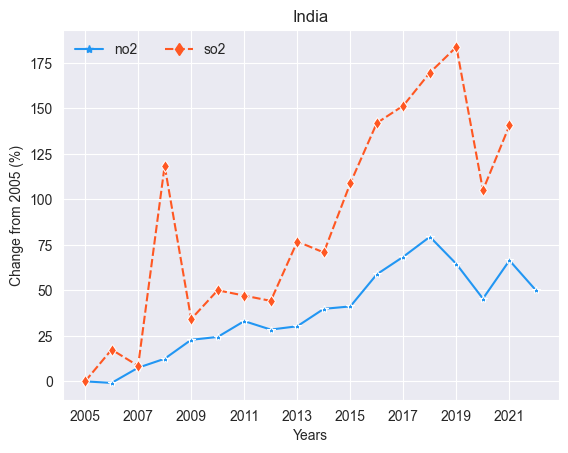

In [98]:
create_chart("india")

China 🇨🇳

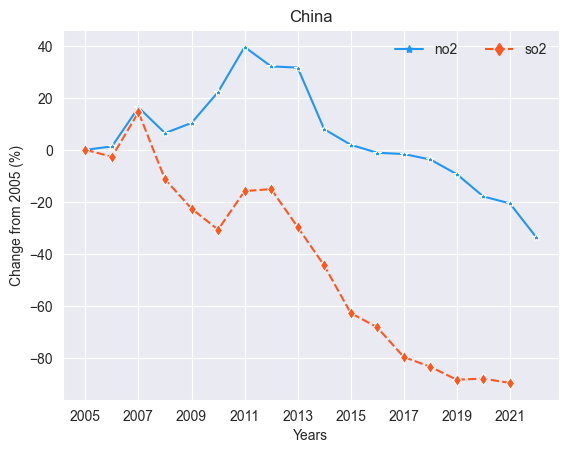

In [99]:
create_chart("china")